# Part I - Prosper Data Loan
## by Bhadmus Samiat

## Introduction
> This dataset contains 113,937 with 81 variables on each loan, including loan amount, borrower rate(or interest rate),current loan status, borrower income, and many others. 


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
###### we have 81 columns in this dataset
# let's drop some columns that are not useful for our dataset
loan= loan.drop(loan.columns[[0,1,3,6,10,11,12,13,16,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,48,50,51,52,53,54,55,56,57,58,59,60,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80]], axis = 1)

In [5]:
loan.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,BorrowerState,Occupation,...,IsBorrowerHomeowner,CurrentlyInGroup,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,CO,Other,...,True,True,472.0,"$25,000-49,999",3083.333333,78,19141,9425,2007-09-12 00:00:00,330.43
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,A,7.0,CO,Professional,...,False,False,0.0,"$50,000-74,999",6125.000000,0,134815,10000,2014-03-03 00:00:00,318.93
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,GA,Other,...,False,True,NaN,Not displayed,2083.333333,86,6466,3001,2007-01-17 00:00:00,123.32
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,A,9.0,GA,Skilled Labor,...,True,False,10056.0,"$25,000-49,999",2875.000000,16,77296,10000,2012-11-01 00:00:00,321.45
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,D,4.0,MN,Executive,...,True,False,0.0,"$100,000+",9583.333333,6,102670,15000,2013-09-20 00:00:00,563.97


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ListingCreationDate         113937 non-null  object 
 1   Term                        113937 non-null  int64  
 2   LoanStatus                  113937 non-null  object 
 3   BorrowerAPR                 113912 non-null  float64
 4   BorrowerRate                113937 non-null  float64
 5   LenderYield                 113937 non-null  float64
 6   ProsperRating (Alpha)       84853 non-null   object 
 7   ProsperScore                84853 non-null   float64
 8   BorrowerState               108422 non-null  object 
 9   Occupation                  110349 non-null  object 
 10  EmploymentStatus            111682 non-null  object 
 11  EmploymentStatusDuration    106312 non-null  float64
 12  IsBorrowerHomeowner         113937 non-null  bool   
 13  CurrentlyInGro

In [7]:
# convert the date columns to datetime format
loan['ListingCreationDate '] = pd.to_datetime(loan['ListingCreationDate'])
loan['LoanOriginationDate '] = pd.to_datetime(loan['LoanOriginationDate'])
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ListingCreationDate         113937 non-null  object        
 1   Term                        113937 non-null  int64         
 2   LoanStatus                  113937 non-null  object        
 3   BorrowerAPR                 113912 non-null  float64       
 4   BorrowerRate                113937 non-null  float64       
 5   LenderYield                 113937 non-null  float64       
 6   ProsperRating (Alpha)       84853 non-null   object        
 7   ProsperScore                84853 non-null   float64       
 8   BorrowerState               108422 non-null  object        
 9   Occupation                  110349 non-null  object        
 10  EmploymentStatus            111682 non-null  object        
 11  EmploymentStatusDuration    106312 non-

In [8]:
#drop the previous date columms
loan= loan.drop(loan.columns[[0,20]],axis = 1)

In [41]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Term                        113937 non-null  int64         
 1   LoanStatus                  113937 non-null  category      
 2   BorrowerAPR                 113912 non-null  float64       
 3   BorrowerRate                113937 non-null  float64       
 4   LenderYield                 113937 non-null  float64       
 5   ProsperRating (Alpha)       84853 non-null   category      
 6   ProsperScore                84853 non-null   float64       
 7   BorrowerState               108422 non-null  category      
 8   Occupation                  110349 non-null  category      
 9   EmploymentStatus            111682 non-null  category      
 10  EmploymentStatusDuration    106312 non-null  float64       
 11  IsBorrowerHomeowner         113937 non-

In [10]:
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [11]:
loan['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [12]:
# convert prosperRating and IncomeRangevt5o ordinal category
ordinal_var_dict = {'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                    'ProsperRating (Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [31]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Term                        113937 non-null  int64         
 1   LoanStatus                  113937 non-null  object        
 2   BorrowerAPR                 113912 non-null  float64       
 3   BorrowerRate                113937 non-null  float64       
 4   LenderYield                 113937 non-null  float64       
 5   ProsperRating (Alpha)       84853 non-null   category      
 6   ProsperScore                84853 non-null   float64       
 7   BorrowerState               108422 non-null  object        
 8   Occupation                  110349 non-null  object        
 9   EmploymentStatus            111682 non-null  object        
 10  EmploymentStatusDuration    106312 non-null  float64       
 11  IsBorrowerHomeowner         113937 non-

In [14]:
loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [40]:
# convert loanstatus,employmentstatus and incomerange into nominal categorical types
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype('category')
loan['LoanStatus'] = loan['LoanStatus'].astype('category')
loan['BorrowerState'] = loan['BorrowerState'].astype('category')
loan['Occupation'] = loan['Occupation'].astype('category')

### What is the structure of your dataset?

> This dataset contains 113,937 with 22 columns. The columns are numeric, categorical(ordinal and nominal) and datetime variables

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in the Borrower Rate and Original loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the loan status and monthly loan payment would support in my investigation.

## Univariate Exploration 


let's first look at the categorical variables starting from loan status using the seaborn's countplot function.

In [58]:
def chart(df, xvar, xy ='x', figsize = (14,6), huevar = None, color = 0, palette = None, order = None, hue_order = None):
    ''' This function helps to create our chart easily and faster '''
    # plot dimensions
    plt.figure(figsize = figsize)
    # create a dictionary for the plot keywords
    keys = {xy:xvar, 'color':sns.color_palette()[color], 'order':order, 'hue':huevar, 'palette':palette, 'hue_order':hue_order, 'edgecolor': 'black'}
    # plot
    sns.countplot(data = df, **keys)
    xvar = xvar.replace("_", " ")
    # replace _ with a space
    if huevar:
        huevar = huevar.replace("_"," ")
    # add title and format it
    plt.title(f'''Distribution Of {xvar} {'by' if huevar else ''}{huevar if huevar else ''}'''.title(), fontsize = 14, weight = 'bold')
    # create a dictionary for the labels keywords i.e xlabel and ylabel
    keys = {f'{xy}label': xvar.title(), f'{"y" if xy == "x" else "x"}label': 'Frequency'}
    plt.gca().set(**keys)

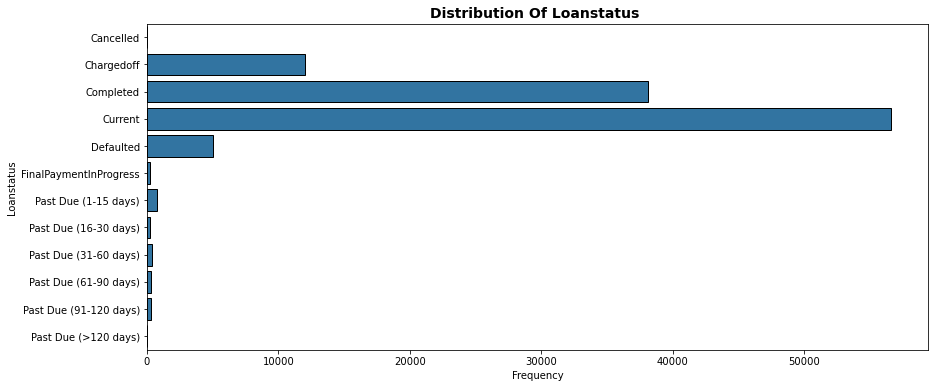

In [59]:
# call plot function
# LoanStatus
chart(loan,'LoanStatus',xy = 'y')

From above, we can see that the loan status that is current or ongoing has the highest freuency follow by the completed loan status and the charged-off status. Note that the cancelled loan status has the lowest count.

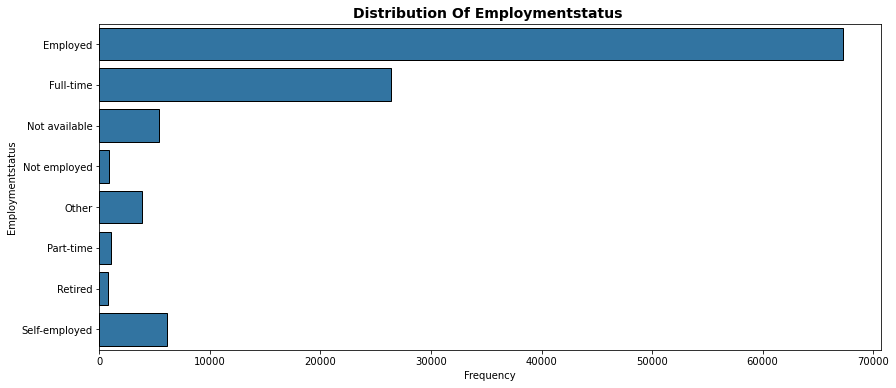

In [60]:
# Employment Status
chart(loan,'EmploymentStatus',xy = 'y')

Interestingly, most of the people that borrows prosper loan are employed.

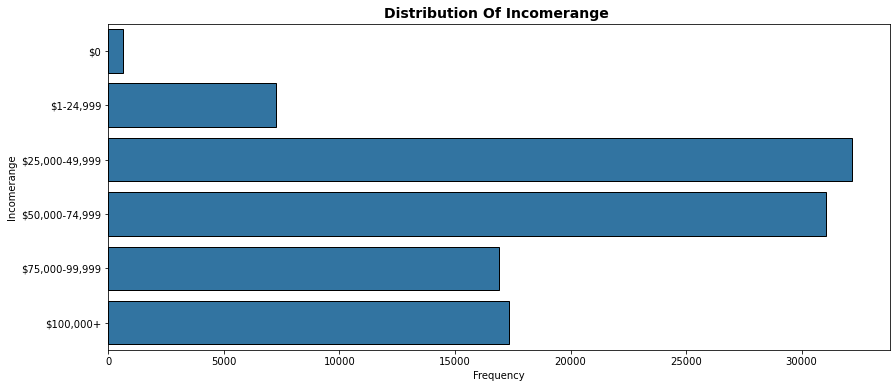

In [61]:
# income range
chart(loan,'IncomeRange',xy = 'y')

We can see that the income of borrower are mostly 25,000 - 49,999 dollars.

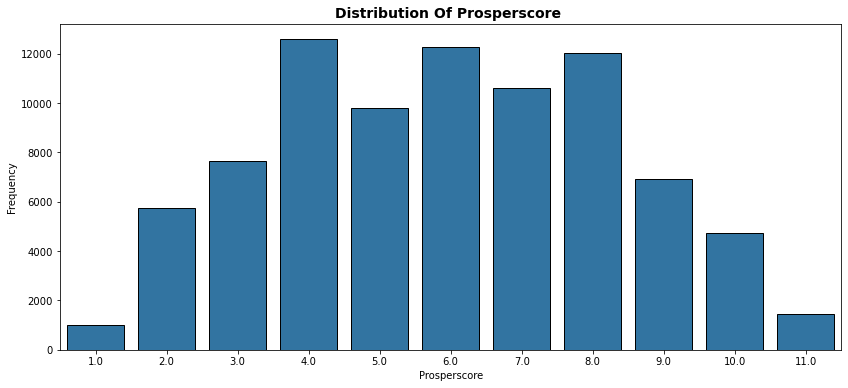

In [63]:
# Prosper Score
chart(loan,'ProsperScore',xy = 'x')

The risk score 4.0,6.0 and 8.0 are mostly given to the borrower

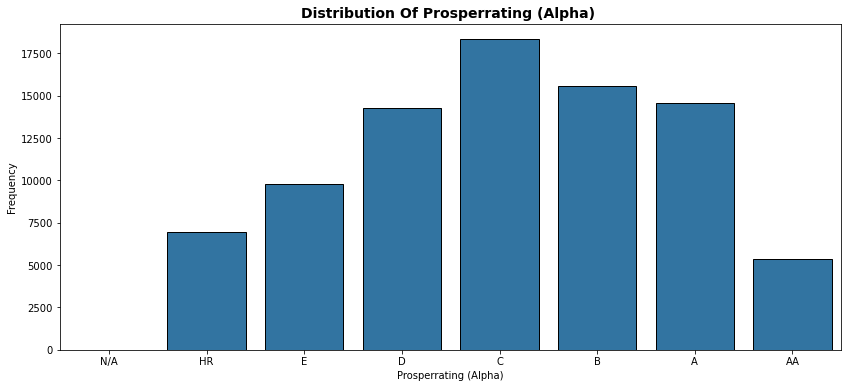

In [65]:
# Prosper Rating (Alpha)
chart(loan,'ProsperRating (Alpha)',xy = 'x')

A prosper rating of C and B are mostly given to borrowers.

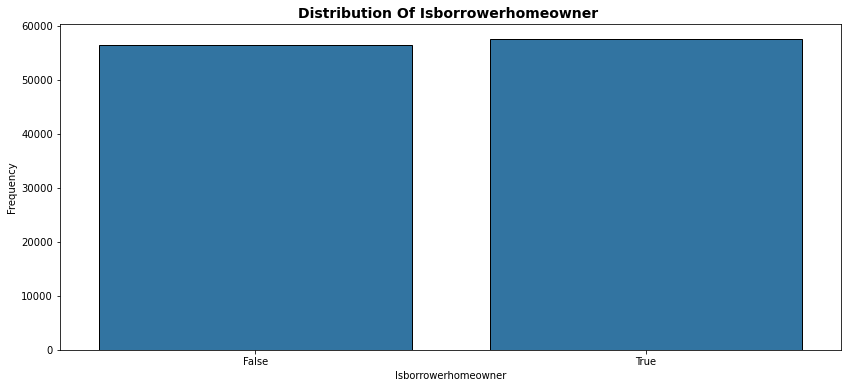

In [66]:
# Is Borrower Homeowner
chart(loan,'IsBorrowerHomeowner',xy = 'x')

Although there is really no difference between if the borrowers are homeowners or not, the people who borrows prosper loan are mostly homeowner.

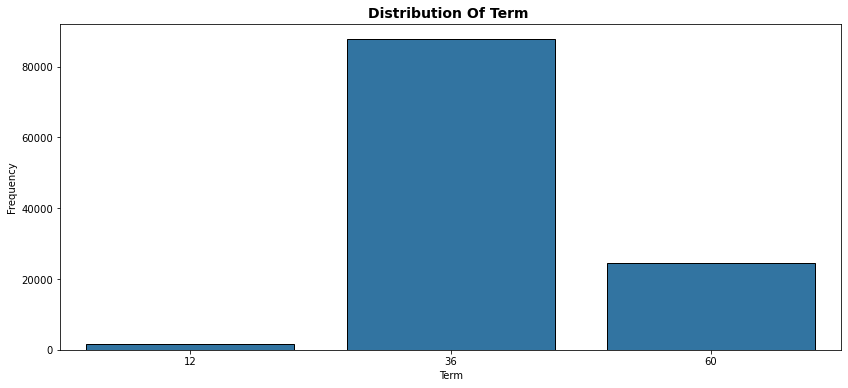

In [67]:
# Term
chart(loan,'Term',xy = 'x')

Most people loans are paid in 36 months which is approximately 3 years.

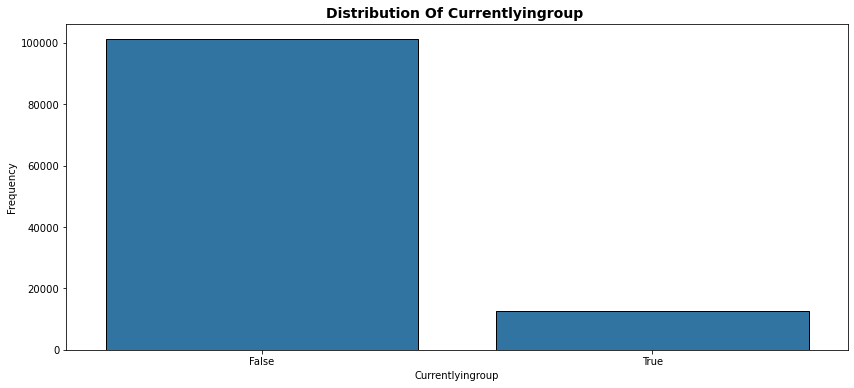

In [68]:
# CurrentlyInGroup
chart(loan,'CurrentlyInGroup',xy = 'x')

From above we see that the borrower currently in group are much lesser than those who aren't.

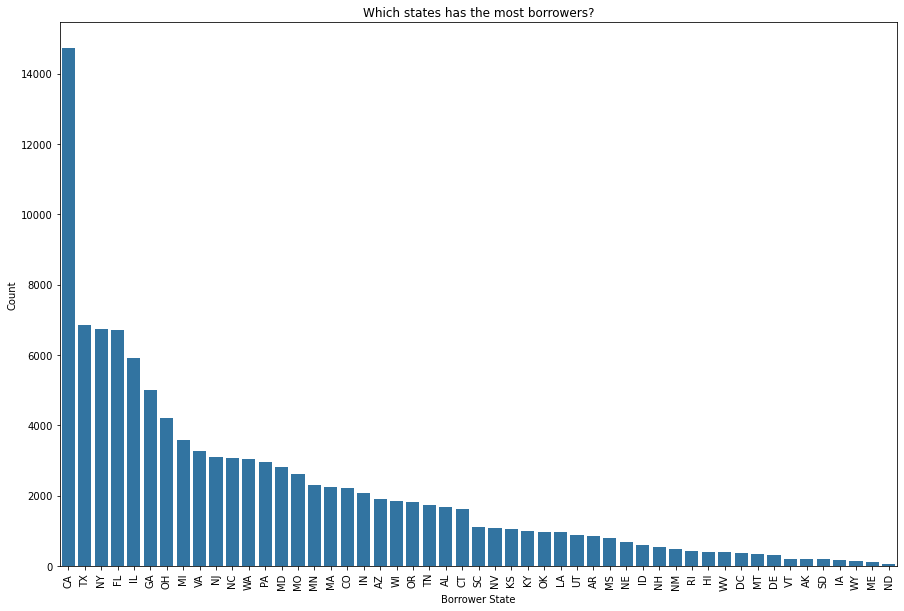

In [70]:
# Borrower state
state = loan['BorrowerState'].value_counts()
index = state.index
plt.figure(figsize= [15,10])
sns.countplot(data = loan, x='BorrowerState' ,order = index, color = sns.color_palette()[0]);
plt.xticks(rotation = 90);
plt.title('Which states has the most borrowers?');
plt.xlabel('Borrower State');
plt.ylabel('Count');

Califronia, Texas and Newyork are the top 3 states with the highest borrowers.

Let's move on to the numerical features starting from the Borrower's APR

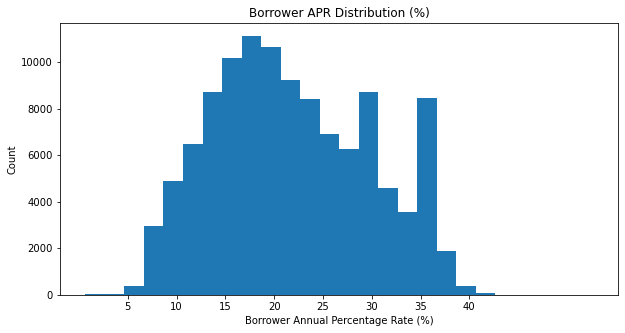

In [25]:
# Distribution of Borrower APR in percentage 
binsize = 2
borrower_APR_percentage = loan['BorrowerAPR']*100
bins = np.arange(loan['BorrowerAPR'].min()*100,loan['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borrower_APR_percentage, bins = bins)
plt.title('Borrower APR Distribution (%)')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
plt.show()

From above, we can see that the peak of the distribution is between 15 and 20 percent. There is also an increase in the 30 and 35 percent.

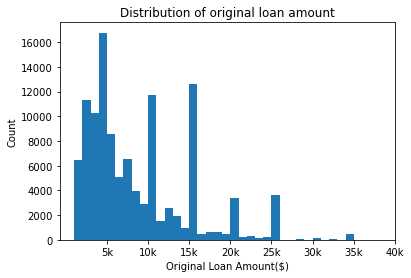

In [26]:
#Distribution of original loan amount
binsize = 1000
bins = np.arange(loan['LoanOriginalAmount'].min(),loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of original loan amount')
plt.xlabel('Original Loan Amount($)')
plt.ylabel('Count')
plt.xticks([5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], ['5k','10k', '15k', '20k', '25k', '30k', '35k', '40k'])
plt.show()

The distribution above is slightly skewed so let's take a look at it on a log scale.

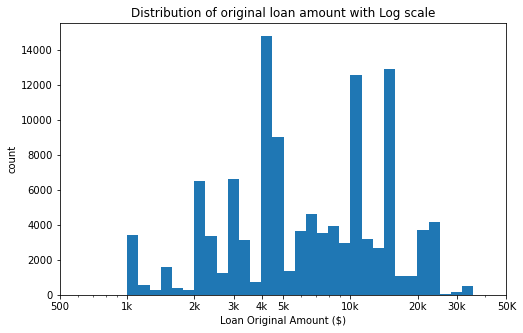

In [27]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.05
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of original loan amount with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3,4e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k','4k','5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

The highest value for original loan amount is between 4k dollars and 5k dollars. There is also an increase between 10k dollars and 20k dollars.

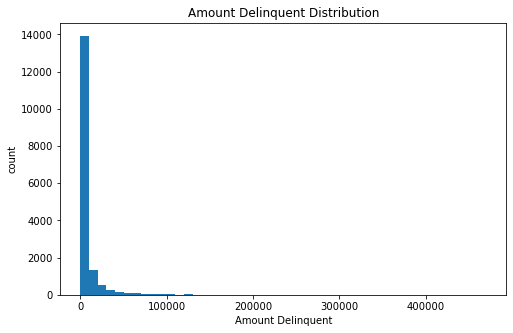

In [28]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(loan['AmountDelinquent'].min(), loan['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan[loan['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count')
plt.show()

The distribution above is right skewed so let's check it on a log scale.

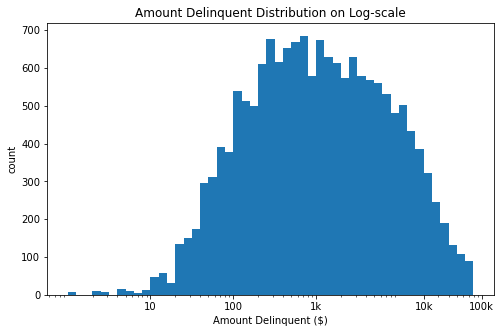

In [29]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.1
bins = 10 ** np.arange(0,5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution on Log-scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.ylabel('count')
plt.show()

The above distribution shows us that the amount deliquent is not up too 100k dollars. 

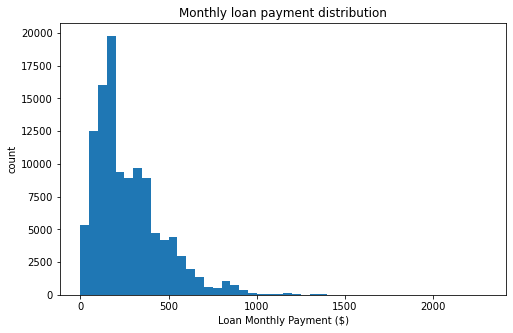

In [30]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, loan['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.ylabel('count')
plt.title('Monthly loan payment distribution')
plt.show()

let's check the distribution above on a log scale.

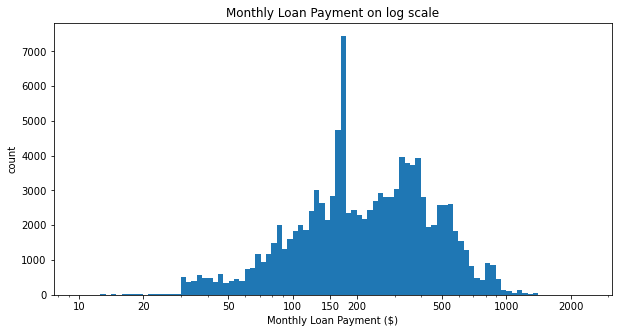

In [31]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(loan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100,150, 200, 500, 1e3, 2e3], ['10', '20','50', '100','150','200', '500', '1000','2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

The distribution above shows that most borrowers pays around $ 150-200 per month.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The borrower APR has a  distribution peak  between 15 and 20 percent. There is also an increase in the 30 and 35 percent.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The original loan amount was skewed so i had to use a log scale to see the distribution clearly. I also did the same for Monthly payment and Amount Deliquent

## Bivariate Exploration


In [32]:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Term', 'ProsperScore','AmountDelinquent']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IncomeRange', 'ProsperRating (Alpha)', 'BorrowerState','Occupation']

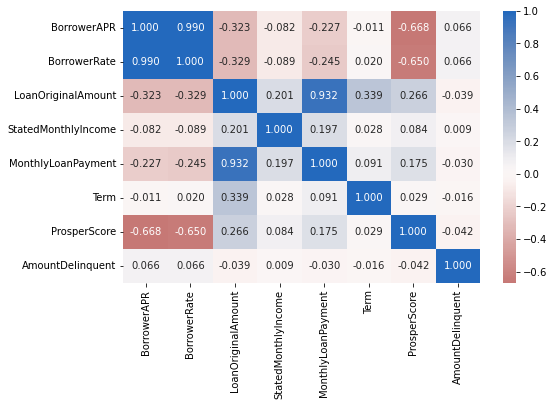

In [33]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

From above, we can see that Borrower APR and Borrower Rate has a strong positive correlation which makes sense because the two features are somehow alike. Borrower APR and Prosper Score has a negative correlation which will be futher investigated on.Interestingly, Loan original amount and Monthly loan payment are positively correlated which would be investigated later on. 

loan.shape= (113937, 22)
loan_samp.shape= (500, 22)


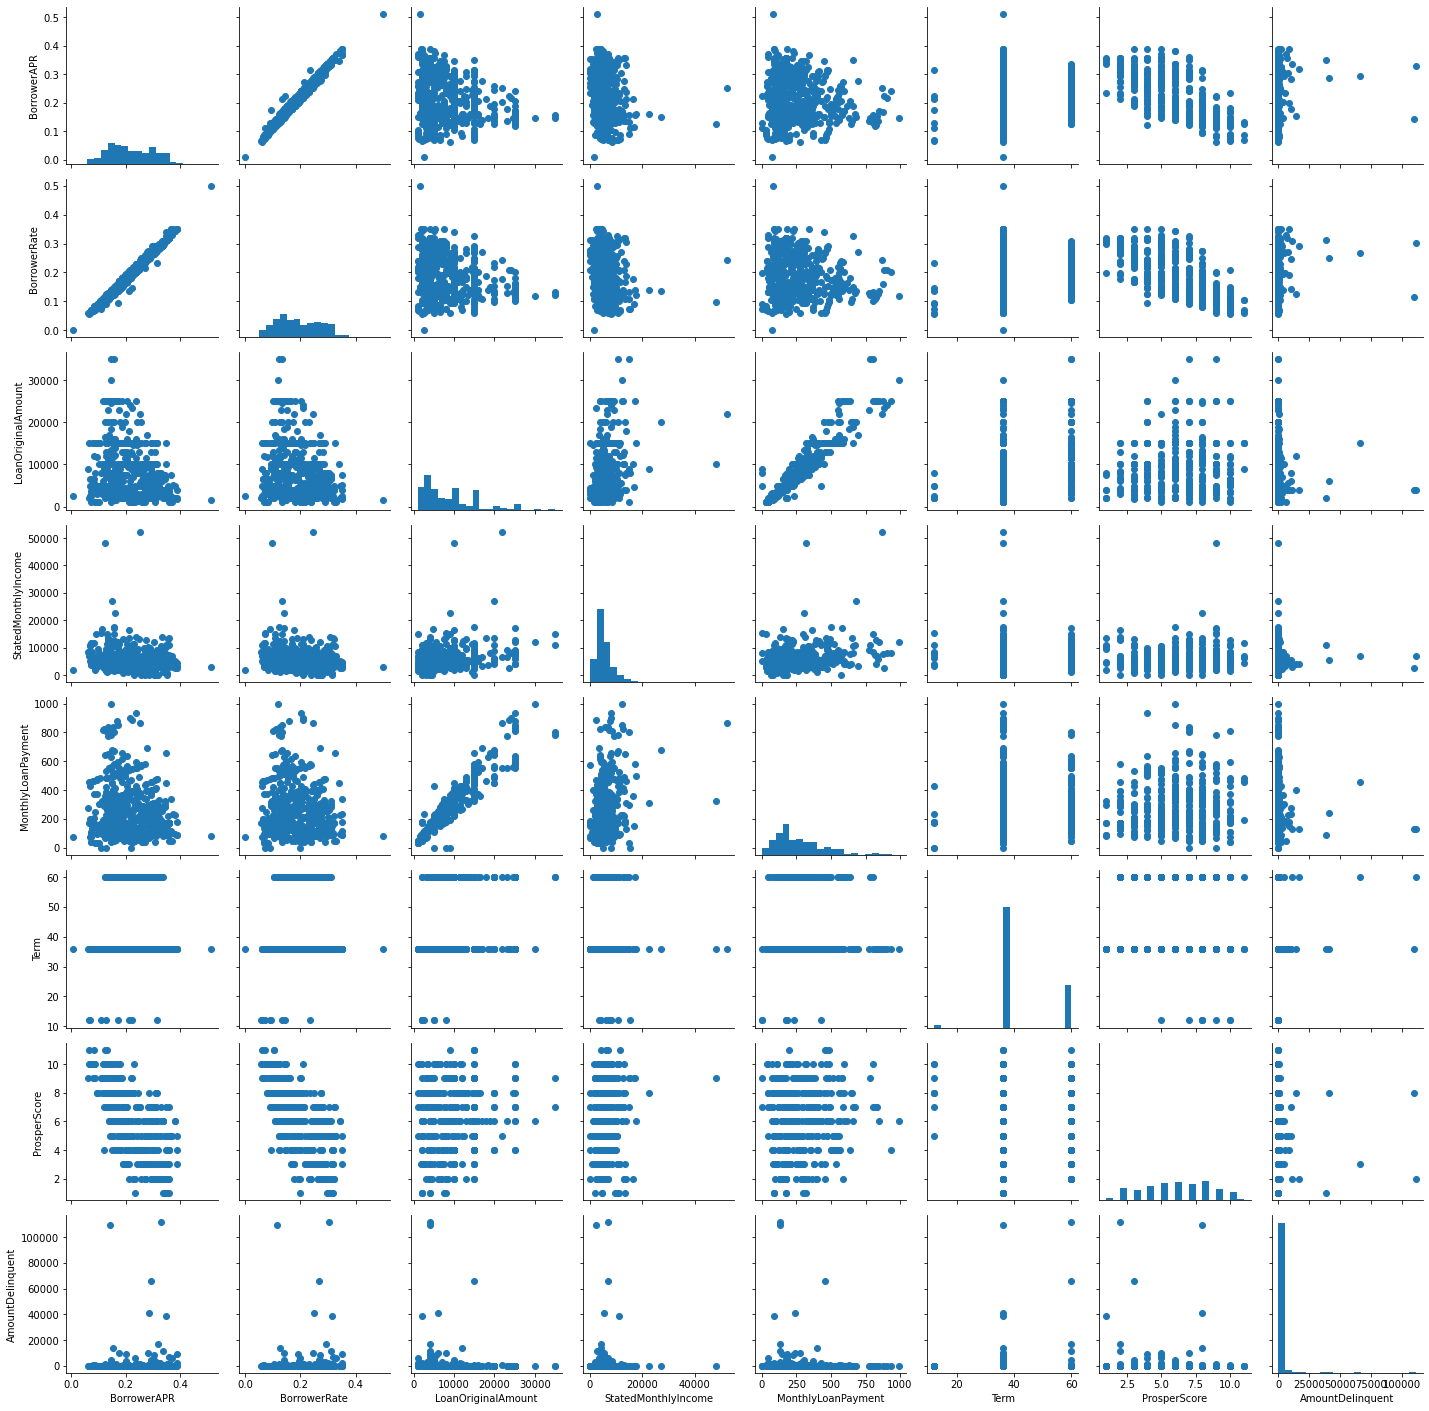

In [34]:
# plot matrix: sample 500 loan so that plots are clearer and they render faster
print("loan.shape=",loan.shape)
loan_samp = loan.sample(n=500, replace = False)
print("loan_samp.shape=",loan_samp.shape)

g = sns.PairGrid(data = loan_samp, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As noted above where we plotted a heat map. Borrower APR and Borrower Rate are negative correlated with prosper score and original loan amount is positively correlated with monthly loan payment.

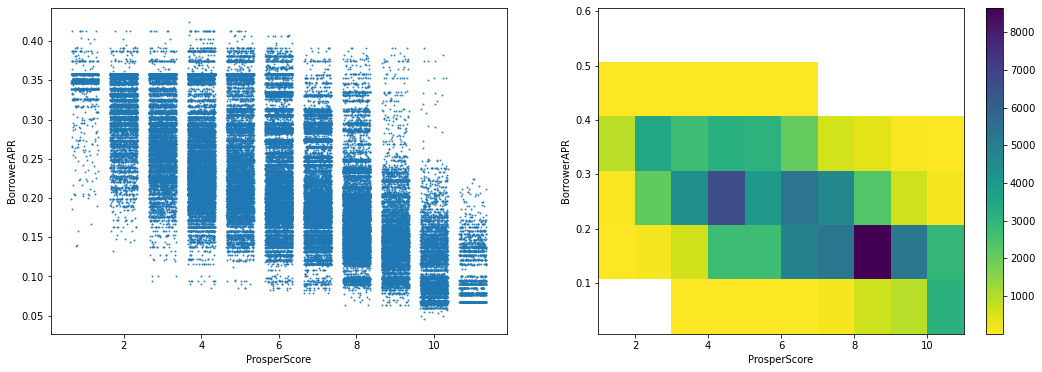

In [81]:
# PROSPER SCORE VERSUS BORROWER APR
plt.figure(figsize = [18, 6])

# PLOT ON LEFT - SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = loan, x = 'ProsperScore', y = 'BorrowerAPR', x_jitter=0.35, scatter_kws={'s':1}, fit_reg=False)
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

# PLOT ON RIGHT- HEAT MAP
plt.subplot(1, 2, 2)
bins_x = np.arange(loan['ProsperScore'].min(), loan['ProsperScore'].max()+1, 1)
bins_y = np.arange(loan['BorrowerAPR'].min(), loan['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = loan, x = 'ProsperScore', y = 'BorrowerAPR',cmin= 0.5, bins = [bins_x,bins_y],cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

As the borrower APR increases, the prosper score given to the borrower decreases.

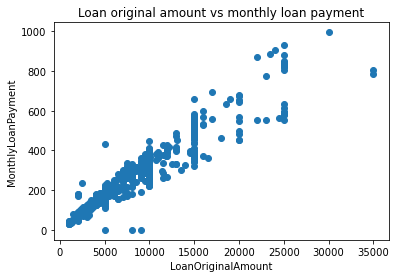

In [36]:
#LOAN ORIGINAL AMOUNT VERSUS MONTHLY LOAN PAYMENT
plt.scatter(data = loan_samp, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.title('Loan original amount vs monthly loan payment');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('MonthlyLoanPayment');

We can see that as the loan amount increases, the monthly loan payment that the borrowers pays increases which means that the higher a borrowers borrow a money, the higher the money he or she would pay monthly and vice versa.

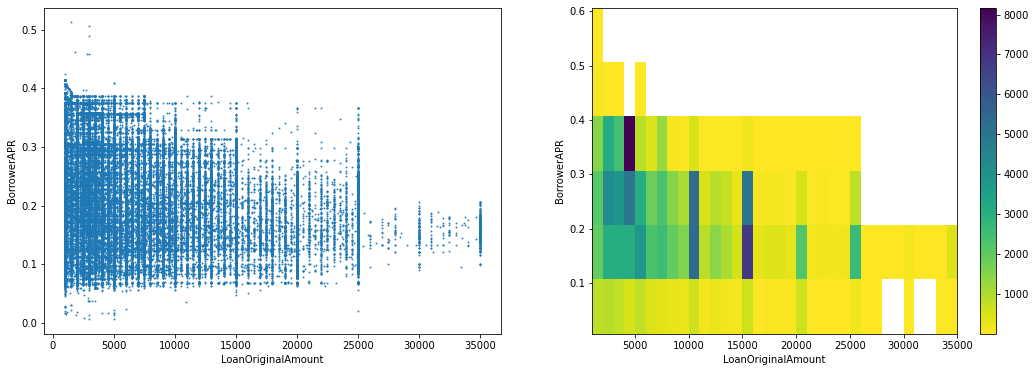

In [80]:
# LOAN ORIGINAL AMOUNT VERSUS BORROWER APR
plt.figure(figsize = [18, 6])

# PLOT ON LEFT - SCATTER
plt.subplot(1, 2, 1)
sns.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'s':1}, fit_reg=False)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

# PLOT ON RIGHT- HEAT MAP
plt.subplot(1, 2, 2)
bins_x = np.arange(loan['LoanOriginalAmount'].min(), loan['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(loan['BorrowerAPR'].min(), loan['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR',cmin= 0.5, bins = [bins_x,bins_y],cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

Although it is not that noticeable, loan original amount and borrower APR are negative correlated which means that as the loan original amount increases, the borrower APR decreases.

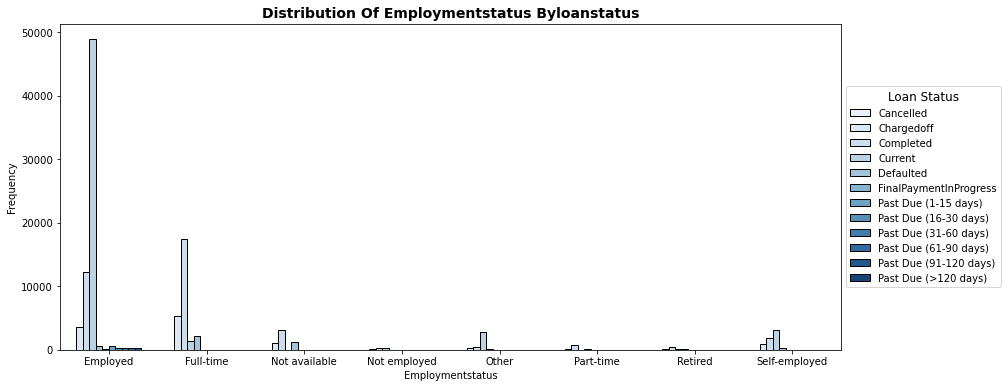

In [72]:
# call plot function
# distribution of employment status by loan status
chart(loan,'EmploymentStatus', huevar ='LoanStatus',palette = 'Blues');
# change legend title and format it
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5), title = 'Loan Status', title_fontsize = 12);


It is not surprising that the borrowers that are employed are the one whose loan status is completed the most.

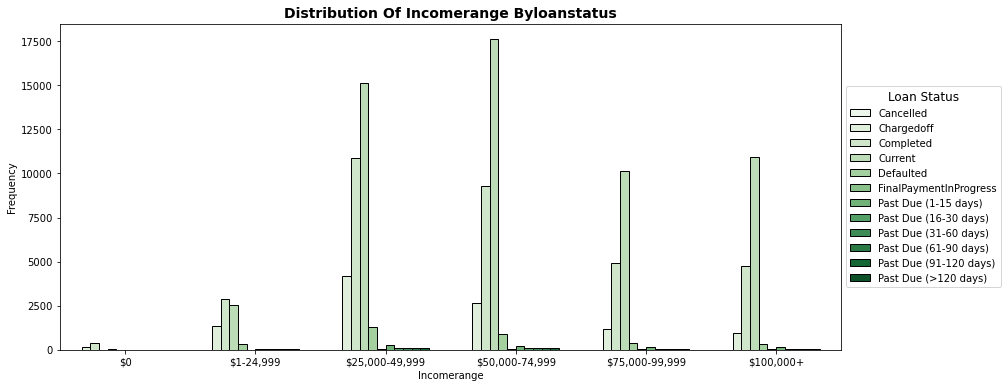

In [73]:
# call plot function
# distribution of Income range by loan status
chart(loan,'IncomeRange', huevar ='LoanStatus',palette = 'Greens');
# change legend title and format it
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5), title = 'Loan Status', title_fontsize = 12);


Although we found out in the univariate exploration that 25,000-49,999 dollars is the range the borrowers mostly earn but interestingly the borrowers that earns $50,000-74,999 are the ones that mostly complete their loan payment.

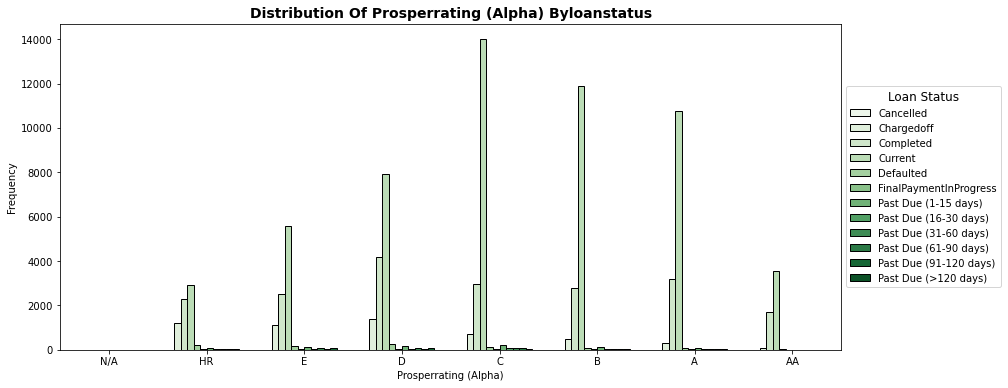

In [74]:
# call plot function
# distribution of ProsperRating (Alpha) by loan status
chart(loan,'ProsperRating (Alpha)', huevar ='LoanStatus',palette = 'Greens');
# change legend title and format it
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5), title = 'Loan Status', title_fontsize = 12);


Mostly borrowers with C ratings have a completed loan status.

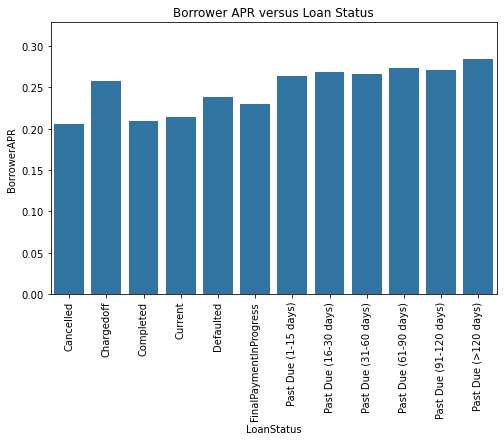

In [41]:
# Borrower APR versus Loan Status
plt.figure(figsize = [8,5])
base_color = sns.color_palette()[0]
sns.barplot(data=loan, x='LoanStatus', y='BorrowerAPR', color=base_color, errwidth=0);
plt.xticks(rotation=90);
plt.title('Borrower APR versus Loan Status');

Interestingly, the current and completed loan status has a lower APR while the past due loan status has a higher APR.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> While investigating the relationships between Borrower APR and other features, i noticed this :
1. Borrower APR and Borrower Rate are strongly positive correlated.
2. As loan original amount increases, Borrower APR decreases
3. As Borrower APR increases, the prosper score or risk score assigned to the borrower decreases

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, The monthly loan payment and original loan payment are positively correlated.

## Multivariate Exploration



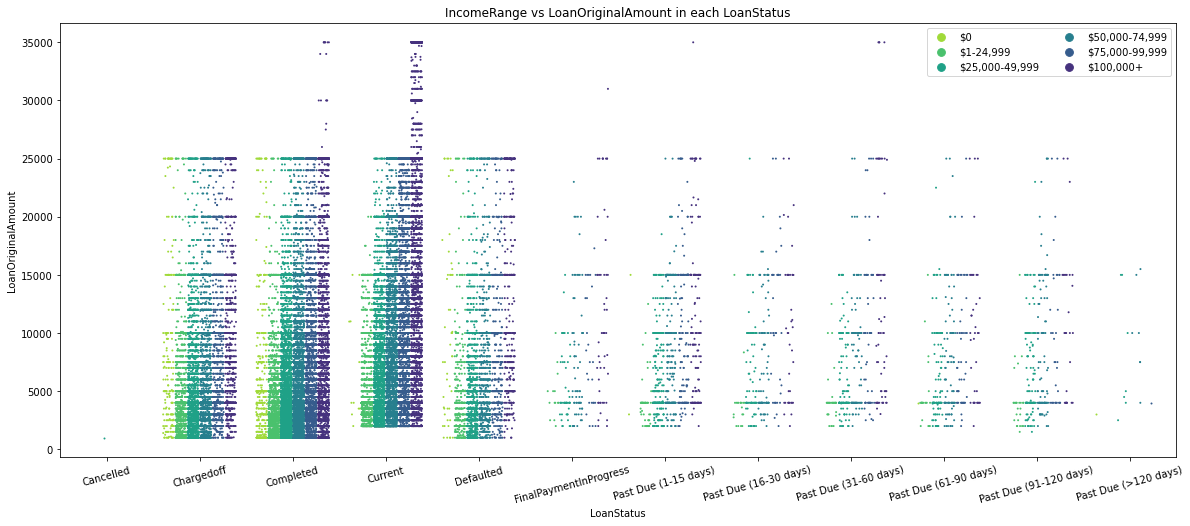

In [77]:
# IncomeRange vs LoanOriginalAmount in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sns.stripplot(data =loan, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'IncomeRange', size = 2, jitter = 0.35,
                  dodge = True, palette = 'viridis_r')
plt.title('IncomeRange vs LoanOriginalAmount in each LoanStatus')
plt.ylabel('LoanOriginalAmount')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

We can see that as the income range increases for most of the loan status, the original loan amount increases. This means that borrowers with high income range tends to borrow more loan than does with low income.

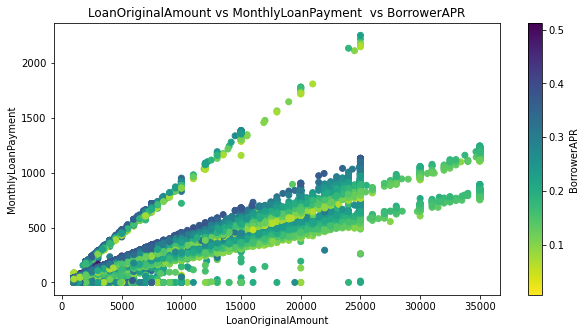

In [43]:
# LoanOriginalAmount vs MonthlyLoanPayment  vs BorrowerAPR
plt.figure(figsize = [10, 5])
plt.scatter(data=loan,x='LoanOriginalAmount',y = 'MonthlyLoanPayment',c='BorrowerAPR',cmap = 'viridis_r')
plt.colorbar(label = 'BorrowerAPR');
plt.title('LoanOriginalAmount vs MonthlyLoanPayment  vs BorrowerAPR');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('MonthlyLoanPayment');

We can see that monthly loan payment and loan original amount are positively correlated to each other but only loan original amount is negatively correlated with borrower APR. 

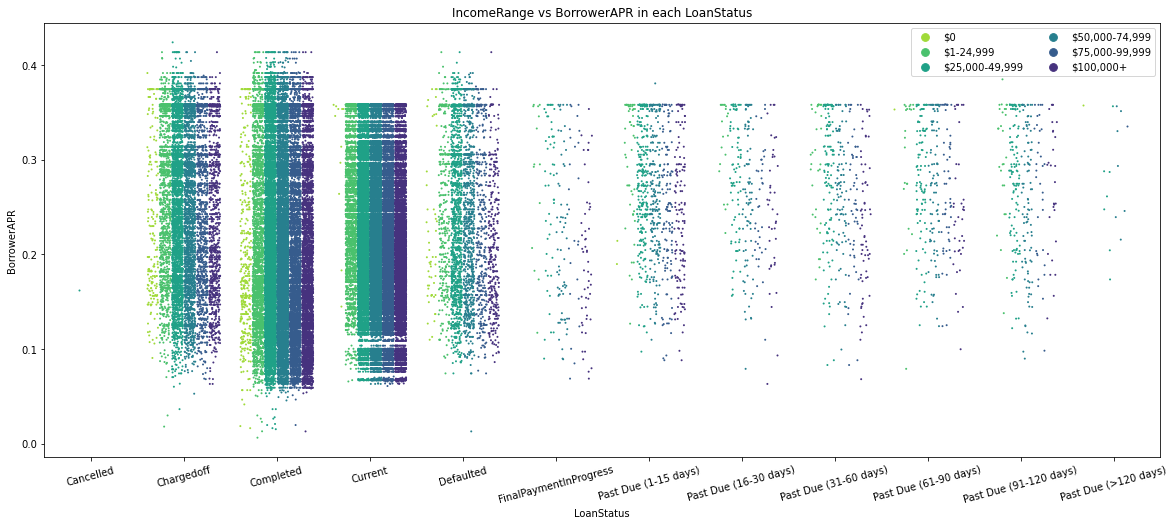

In [78]:
# IncomeRange vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sns.stripplot(data =loan, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IncomeRange', size = 2, jitter = 0.35,
                  dodge = True, palette = 'viridis_r')
plt.title('IncomeRange vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

Interestingly, For most of the loan status including the current and completed loan status, the borrower APR decreases with increasing income range.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relationship between original loan amount, borrower APR and monthly loan payment:
As observed, there is an obvious relationship between original loan amount and monthly loan payment with original loan amount and borrower APR but there is no relationship between monthly loan payment and borrower APR which means that monthly loan payment is not a factor affecting borrower APR but original loan amount is.

### Were there any interesting or surprising interactions between features?

> Yes,there was a surprising relationship between loan status, income range and original loan amount.As the income range increases for most of the loan status, the original loan amount increases.